In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/ASL128.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

import numpy as np

In [ ]:

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/ASL Dataset/test",
    image_size=(128, 128),  # Resize images to the size your model expects
    batch_size=512,  # You can specify a batch size or use the default
    # shuffle=False, # Keep data in order for later comparison
    labels = "inferred", #-->take the labelsname from directory
   label_mode = 'int', #-->assign integer value each and every label


   seed = 123 #-->used for replication

)

Found 4897 files belonging to 36 classes.


In [ ]:
# # Function to convert RGB image to grayscale (black and white)
# def rgb_to_black_and_white(image, label):
#     # Convert the image to grayscale using luminance method
#     grayscale_image = tf.image.rgb_to_grayscale(image)
#     return grayscale_image, label

# # Convert test dataset to black and white
# test_ds = test_ds.map(rgb_to_black_and_white)

In [ ]:
test_ds = test_ds.map(lambda x,y: (x/255,y))

In [ ]:
import numpy as np
import tensorflow as tf

# Assuming test_ds is your test dataset
X_test = []
y_test = []

# Iterate over the dataset
for img_batch, label_batch in test_ds:
    # Convert the batch to numpy arrays and append to lists
    X_test.append(img_batch.numpy())
    y_test.append(label_batch.numpy())

# Concatenate all batches
X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

154/154 [==============================] - 45s 284ms/step - loss: 0.0790 - accuracy: 0.9802
Test loss: 0.07901061326265335
Test accuracy: 0.9801919460296631


In [ ]:
predictions = model.predict(X_test)

# If your model outputs probabilities, convert to class labels
y_pred = np.argmax(predictions, axis=1)

# Your true labels
y_true = y_test  # Assuming y_test contains your true integer labels

154/154 [==============================] - 43s 279ms/step


In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred, target_names=class_names))
# Compute and plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       114
           1       0.98      0.94      0.96       101
           2       0.92      0.98      0.95       101
           3       0.94      1.00      0.97       101
           4       0.98      0.91      0.94       101
           5       1.00      1.00      1.00       101
           6       1.00      1.00      1.00       155
           7       0.98      0.95      0.96       151
           8       0.81      0.99      0.89       144
           9       0.98      0.80      0.88       151
           A       1.00      1.00      1.00       161
           B       1.00      0.99      1.00       163
           C       1.00      1.00      1.00       154
           D       1.00      0.99      1.00       134
           E       1.00      1.00      1.00       158
           F       1.00      1.00      1.00       102
           G       1.00      1.00      1.00       157
           H       1.00    

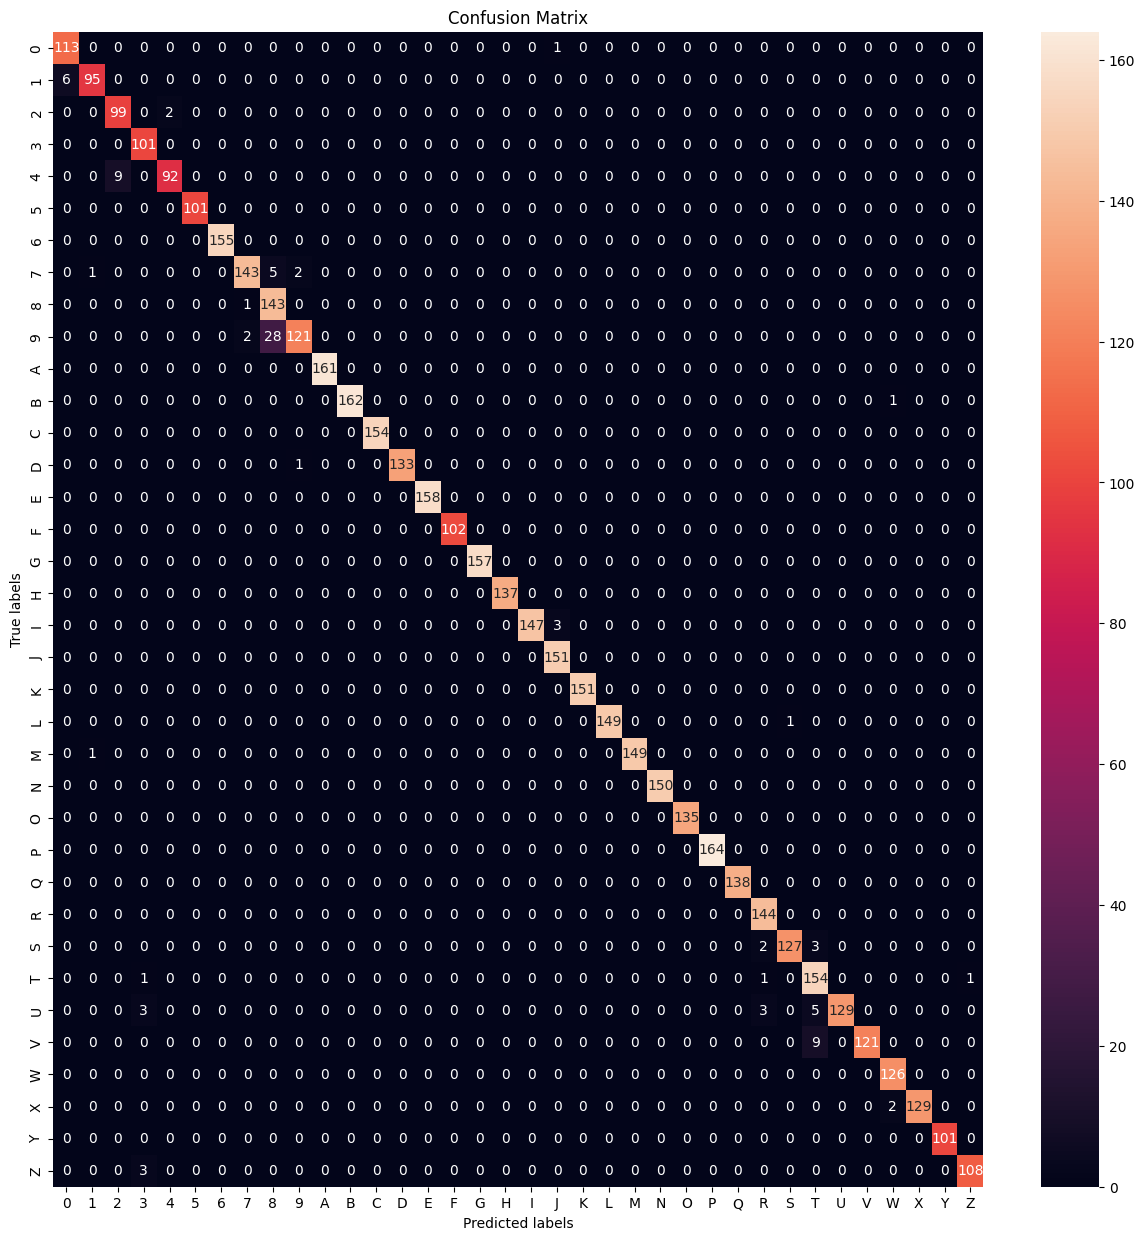

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

1/1 [==============================] - 0s 31ms/step


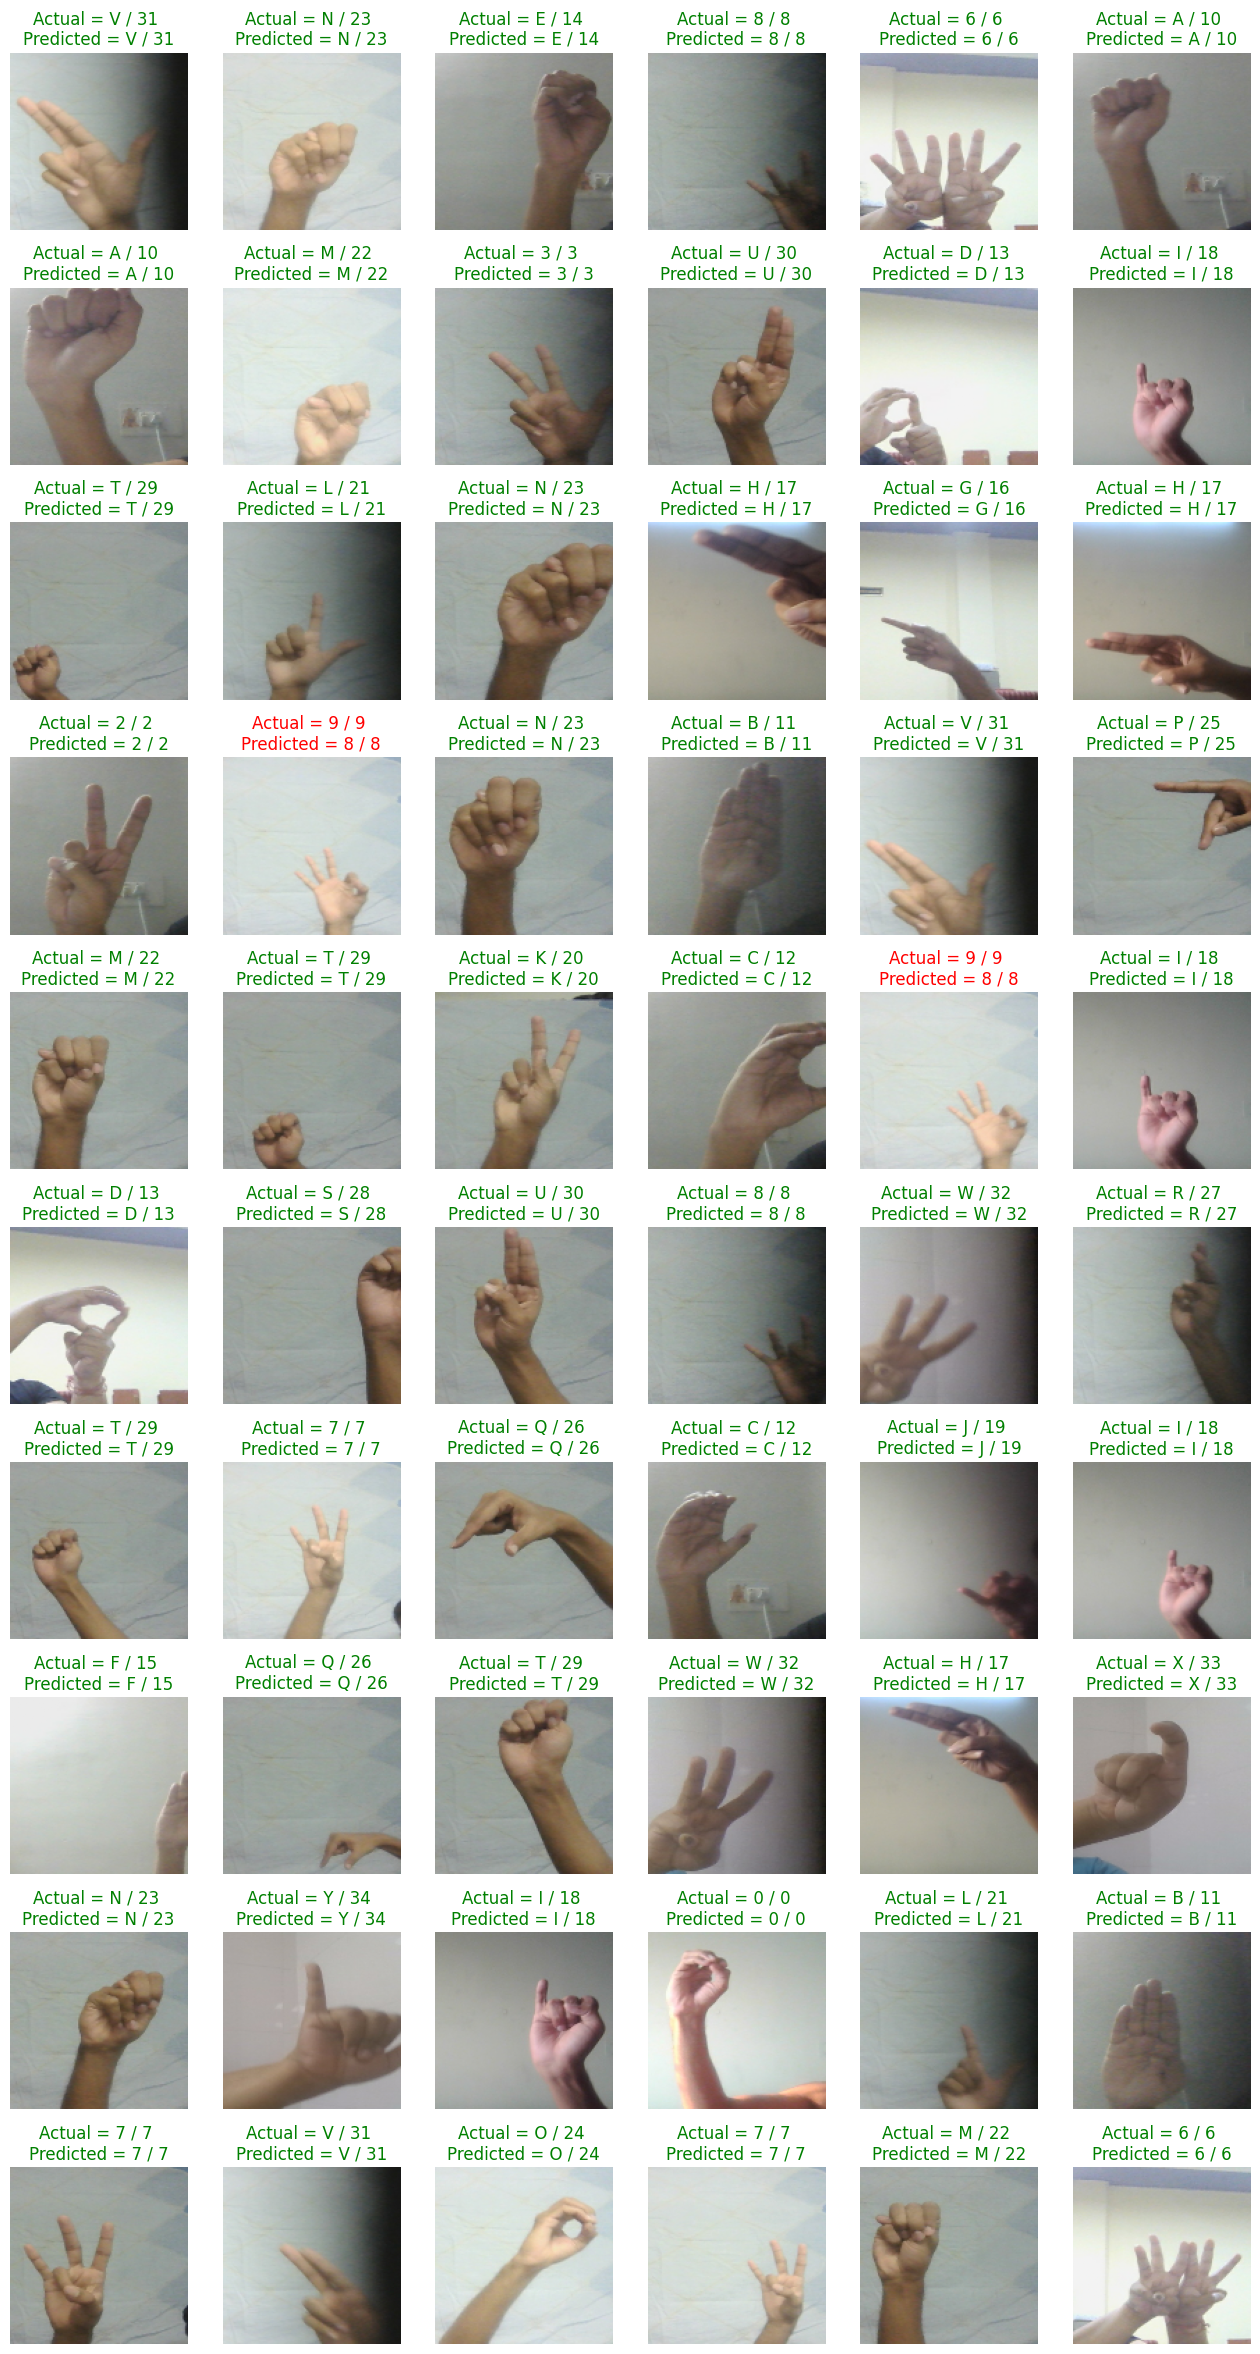

In [ ]:
plt.figure(figsize=(16, 30))
j = 1
for i in np.random.randint(0, 1000, 60):
    plt.subplot(10, 6, j)
    j += 1
    plt.imshow(X_test[i].reshape(128, 128, 3), cmap='gray')
    y_pred_single = model.predict(np.expand_dims(X_test[i], axis=0))  # Get prediction for single image
    if class_names[y_test[i]] == class_names[np.argmax(y_pred_single)]:
        color = "green"
    else:
        color = "red"

    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_names[y_test[i]], y_test[i], class_names[np.argmax(y_pred_single)], np.argmax(y_pred_single)), color=color)
    plt.axis('off')

plt.show()